In [5]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, KMeans
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
import warnings

warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('../data/diamonds.csv')
df

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
df2 = df.drop('id', axis=1)
df2 = pd.get_dummies(df2, columns=["cut", 'color', 'clarity'])
df2

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
for i in df2.loc[:, df2.columns != 'price']:
    df2[i] = df2[i] / max(df2[i])
df2

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.045908,0.778481,0.578947,326,0.367784,0.067572,0.076415,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.041916,0.756962,0.642105,326,0.362197,0.065195,0.072642,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.045908,0.720253,0.684211,327,0.377095,0.069100,0.072642,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.057884,0.789873,0.610526,334,0.391061,0.071817,0.082704,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.061876,0.801266,0.610526,335,0.404097,0.073854,0.086478,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.143713,0.769620,0.600000,2757,0.535382,0.097793,0.110063,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.143713,0.798734,0.578947,2757,0.529795,0.097623,0.113522,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.139721,0.794937,0.631579,2757,0.527002,0.096435,0.111950,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.171657,0.772152,0.610526,2757,0.572626,0.103905,0.117610,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


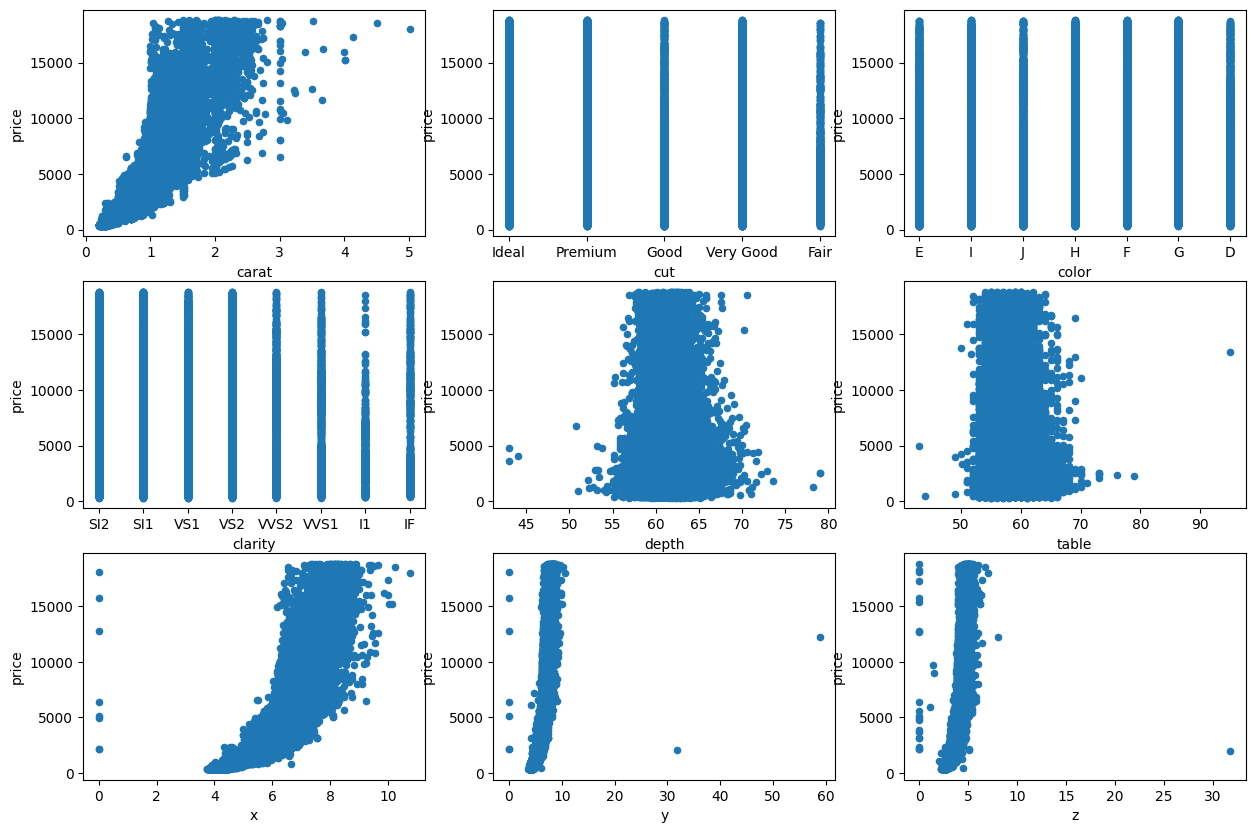

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for idx, feature in enumerate(df.columns[1:7].append(df.columns[8:])):
    df.plot(feature, "price", subplots=True, kind="scatter", ax=axes[idx // 3, idx % 3])

In [10]:
X = df2.loc[:, df2.columns != 'price']
y = df2.loc[:, df2.columns == 'price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [11]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

for i, j in zip(X.columns, *model_LR.coef_):
    print(i, j)

carat 58029.234646726654
depth -5525.180018305216
table -2745.7883593265014
x -13607.089225740405
y 6760.728001752266
z -355.95396939673606
cut_Fair -754912512631530.0
cut_Good -754912512630988.2
cut_Ideal -754912512630725.5
cut_Premium -754912512630782.6
cut_Very Good -754912512630835.0
color_D -60053104240348.7
color_E -60053104240537.69
color_F -60053104240603.055
color_G -60053104240824.94
color_H -60053104241323.23
color_I -60053104241816.29
color_J -60053104242735.79
clarity_I1 1619193477400196.0
clarity_IF 1619193477405376.5
clarity_SI1 1619193477403733.2
clarity_SI2 1619193477402767.5
clarity_VS1 1619193477404650.0
clarity_VS2 1619193477404337.8
clarity_VVS1 1619193477405034.5
clarity_VVS2 1619193477405009.8


In [12]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

for i, j in zip(X.columns, *model_ridge.coef_):
    print(i, j)

carat 53474.93200148553
depth -3571.299774175843
table -2230.6987330300244
x -8245.716047729979
y 242.83142989989938
z -1049.6719196694532
cut_Fair -590.6029698480078
cut_Good -19.12691993618761
cut_Ideal 262.87176677867564
cut_Premium 194.71435017472612
cut_Very Good 152.14377282000075
color_D 810.8022997518915
color_E 622.292174746957
color_F 550.1868156127783
color_G 332.8964311434545
color_H -152.05907164794425
color_I -629.2752746553577
color_J -1534.8433749639116
clarity_I1 -3675.7779029493245
clarity_IF 1510.6967924456087
clarity_SI1 -181.30294496818235
clarity_SI2 -1130.3066378406156
clarity_VS1 747.868048187095
clarity_VS2 438.3271235264886
clarity_VVS1 1160.8151666480394
clarity_VVS2 1129.6803549227907


In [13]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

for i, j in zip(X.columns, model_lasso.coef_):
    print(i, j)

carat 52301.84160804784
depth -0.0
table -0.0
x -7363.675048079893
y -0.0
z -0.0
cut_Fair -840.2648511382267
cut_Good -202.72588942544527
cut_Ideal 160.0010651759294
cut_Premium 42.67977303799506
cut_Very Good 0.0
color_D 472.016500937147
color_E 285.25597050547225
color_F 212.36849171339242
color_G 0.0
color_H -480.5262490095052
color_I -952.3792338231837
color_J -1850.4374895996152
clarity_I1 -4164.702526457373
clarity_IF 970.3523761805384
clarity_SI1 -719.758092584961
clarity_SI2 -1662.0406714419557
clarity_VS1 209.81948937021807
clarity_VS2 -90.82521808069708
clarity_VVS1 627.001197565182
clarity_VVS2 596.1348972105488


In [14]:
# Инициализируем модель решающего дерева
model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева +5-5
                               max_depth=10,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5,
                               # Минимальное значение дельты impurity
                               # min_impurity_decrease=0,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # Поддерживает опцию 'balanced'.
                               class_weight=None
                               )

# Обучаем модель
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [15]:
pd.DataFrame({'feature': df2.loc[:, df2.columns != 'price'].columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
4,y,0.149371
3,x,0.124902
0,carat,0.110154
23,clarity_VS2,0.085258
20,clarity_SI1,0.078011
14,color_G,0.070823
11,color_D,0.045801
12,color_E,0.045083
15,color_H,0.039712
13,color_F,0.038037


In [16]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [17]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
conf_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
rf = RandomForestRegressor(random_state=0)
cb = CatBoostRegressor()

rf.fit(X_train, y_train)
cb.fit(X_train, y_train)

predict_rf = rf.predict(X_test)
predict_cb = cb.predict(X_test)

Learning rate set to 0.072167
0:	learn: 3732.0176718	total: 135ms	remaining: 2m 15s
1:	learn: 3506.0217623	total: 138ms	remaining: 1m 8s
2:	learn: 3298.9302406	total: 141ms	remaining: 46.8s
3:	learn: 3102.6551739	total: 143ms	remaining: 35.7s
4:	learn: 2927.5038868	total: 146ms	remaining: 29s
5:	learn: 2761.8722330	total: 149ms	remaining: 24.6s
6:	learn: 2610.4348724	total: 151ms	remaining: 21.4s
7:	learn: 2471.3523872	total: 154ms	remaining: 19.1s
8:	learn: 2349.1876895	total: 156ms	remaining: 17.2s
9:	learn: 2232.2662399	total: 159ms	remaining: 15.7s
10:	learn: 2120.8784723	total: 161ms	remaining: 14.5s
11:	learn: 2020.7782732	total: 164ms	remaining: 13.5s
12:	learn: 1926.0331213	total: 167ms	remaining: 12.7s
13:	learn: 1837.9314660	total: 169ms	remaining: 11.9s
14:	learn: 1761.5640699	total: 172ms	remaining: 11.3s
15:	learn: 1685.2150416	total: 174ms	remaining: 10.7s
16:	learn: 1618.3137250	total: 177ms	remaining: 10.2s
17:	learn: 1557.2414100	total: 180ms	remaining: 9.8s
18:	learn:

In [19]:
cluster_tags = df2.columns

In [20]:
t = 20  #Перебор количества кластеров
# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []
X = df2[cluster_tags]
for i in range(1, t):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=2000, n_init=10, random_state=42)
    kmeans.fit(X)

    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

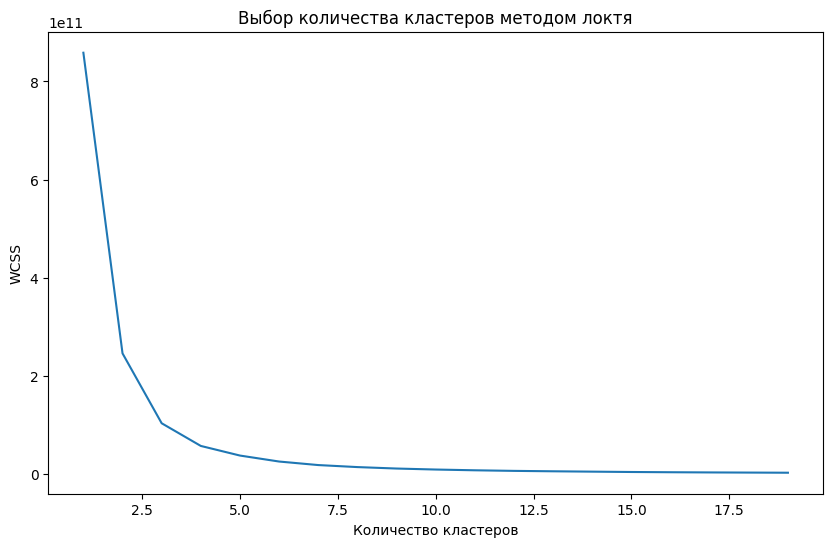

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, t), wcss)

plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

In [22]:
km_scores = []
km_silhouette = []
vmeasure_score = []
db_score = []
X_scaled = X.copy()
for i in range(2, t):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)

    print("Score for number of cluster(s) {}: {}".format(i, km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))

    silhouette = silhouette_score(X_scaled, preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i, silhouette))

    db = davies_bouldin_score(X_scaled, preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i, db))

    # v_measure = v_measure_score(y,preds)
    # vmeasure_score.append(v_measure)
    # print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-" * 100)

Score for number of cluster(s) 2: -245754601358.31396
Silhouette score for number of cluster(s) 2: 0.7078844647364685
Davies Bouldin score for number of cluster(s) 2: 0.496714618743448
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -103343192850.12259
Silhouette score for number of cluster(s) 3: 0.6602583506693451
Davies Bouldin score for number of cluster(s) 3: 0.4811395187664626
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -57123950483.62174
Silhouette score for number of cluster(s) 4: 0.6498951062779149
Davies Bouldin score for number of cluster(s) 4: 0.48018119610711896
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -37520271885.123436
Silhouette score for number of cluster(s) 5: 0.6215777989213074
Davies Bouldin score f

In [53]:
km_scores = [245754601358.31396, 103343192850.12259, 57123950483.62174, 37520271885.123436, 25339720124.40537, 18140997037.777218, 14018644449.686539, 11058978103.516027, 9030104523.284641, 7484599869.89816, 6291473933.656228, 5450121252.334143, 4718778720.368809, 4007708079.063389,
             3517453379.8384156, 3123589693.500482, 2828189630.4111714, 2527623037.377914]
km_silhouette = [0.7078844647364685, 0.6602583506693451, 0.6498951062779149, 0.6215777989213074, 0.6116343709348674, 0.6139734542071953, 0.6096564498896526, 0.6034917880543506, 0.5946959261127928, 0.5935717578706139, 0.5819924654203296, 0.5473292920343801, 0.5536653247227019, 0.5533908431346181,
                 0.5529299584970212, 0.5515891903820751, 0.5498743825307799, 0.5514783531101647]
vmeasure_score = []
db_score = [0.496714618743448, 0.4811395187664626, 0.48018119610711896, 0.5029815221671389, 0.4855600114032173, 0.48739195859734785, 0.496318643107274, 0.49295830945303226, 0.49841786341663996, 0.4981601964700767, 0.4995369394383387, 0.5116836376560976, 0.5056562669368867, 0.5060414416003189,
            0.5057416200583452, 0.5066009426640857, 0.511233556245491, 0.5053027084679474]


[245754601358.31396, 103343192850.12259, 57123950483.62174, 37520271885.123436, 25339720124.40537, 18140997037.777218, 14018644449.686539, 11058978103.516027, 9030104523.284641, 7484599869.89816, 6291473933.656228, 5450121252.334143, 4718778720.368809, 4007708079.063389, 3517453379.8384156, 3123589693.500482, 2828189630.4111714, 2527623037.377914]
[0.7078844647364685, 0.6602583506693451, 0.6498951062779149, 0.6215777989213074, 0.6116343709348674, 0.6139734542071953, 0.6096564498896526, 0.6034917880543506, 0.5946959261127928, 0.5935717578706139, 0.5819924654203296, 0.5473292920343801, 0.5536653247227019, 0.5533908431346181, 0.5529299584970212, 0.5515891903820751, 0.5498743825307799, 0.5514783531101647]
[]
[0.496714618743448, 0.4811395187664626, 0.48018119610711896, 0.5029815221671389, 0.4855600114032173, 0.48739195859734785, 0.496318643107274, 0.49295830945303226, 0.49841786341663996, 0.4981601964700767, 0.4995369394383387, 0.5116836376560976, 0.5056562669368867, 0.5060414416003189, 0.5

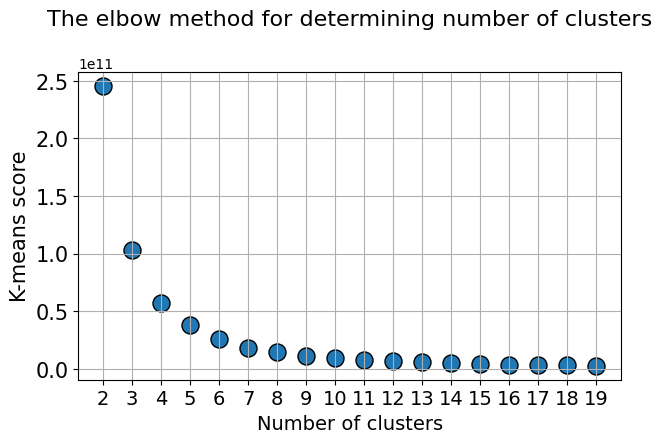

In [23]:
plt.figure(figsize=(7, 4))
plt.title("The elbow method for determining number of clusters\n", fontsize=16)
plt.scatter(x=[i for i in range(2, t)], y=km_scores, s=150, edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("K-means score", fontsize=15)
plt.xticks([i for i in range(2, t)], fontsize=14)
plt.yticks(fontsize=15)
plt.show()

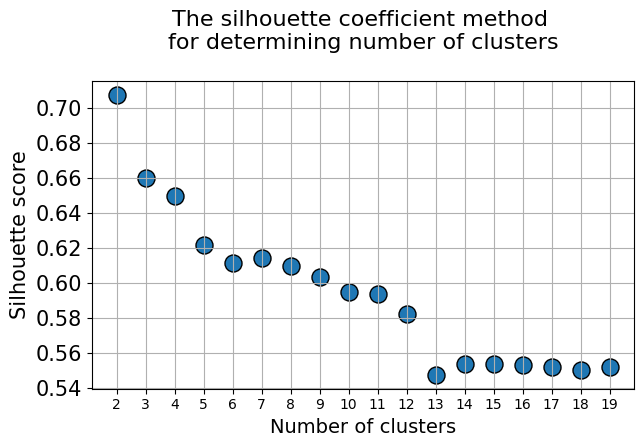

In [24]:
plt.figure(figsize=(7, 4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n", fontsize=16)
plt.scatter(x=[i for i in range(2, t)], y=km_silhouette, s=150, edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Silhouette score", fontsize=15)
plt.xticks([i for i in range(2, t)], fontsize=10)
plt.yticks(fontsize=15)
plt.show()

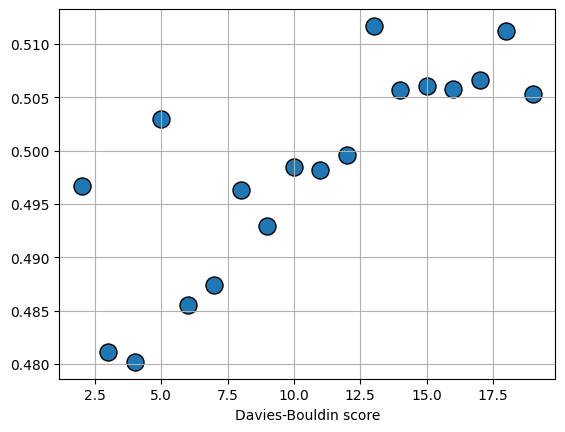

In [25]:
plt.scatter(x=[i for i in range(2, t)], y=db_score, s=150, edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

In [26]:
gm_bic = []
gm_score = []
for i in range(2, t):
    gm = GaussianMixture(n_components=i, n_init=10, tol=1e-3, max_iter=2000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i, gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i, gm.score(X_scaled)))
    print("-" * 100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))


BIC for number of cluster(s) 2: -4058194.5705579617
Log-likelihood score for number of cluster(s) 2: 37.69958217036411
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -4917081.732866378
Log-likelihood score for number of cluster(s) 3: 45.702092247418925
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -6019778.462099062
Log-likelihood score for number of cluster(s) 4: 55.96460943352333
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -5957738.100821214
Log-likelihood score for number of cluster(s) 5: 55.43052770870324
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -7006496.4852076955
Log-likelihood score for number of cluster(s) 6: 65.19306023735302
---

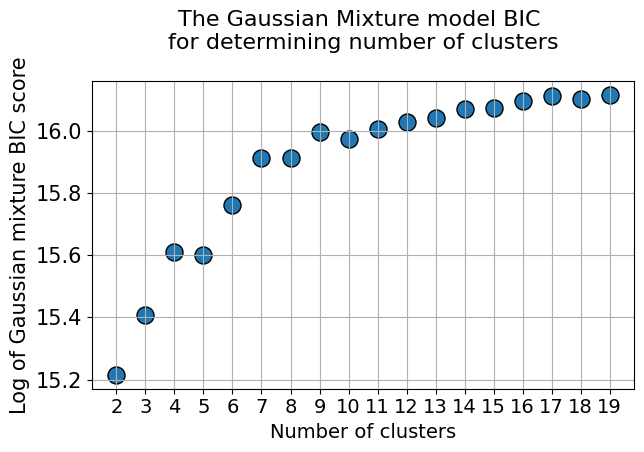

In [27]:
plt.figure(figsize=(7, 4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n", fontsize=16)
plt.scatter(x=[i for i in range(2, t)], y=np.log(np.abs(gm_bic)), s=150, edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score", fontsize=15)
plt.xticks([i for i in range(2, t)], fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [28]:
model_cluster_6 = KMeans(6)
model_cluster_6.fit(X_scaled)
y_pred_km_6 = model_cluster_6.predict(X_scaled)
model_cluster_13 = KMeans(13)
model_cluster_13.fit(X_scaled)
y_pred_km_13 = model_cluster_13.predict(X_scaled)

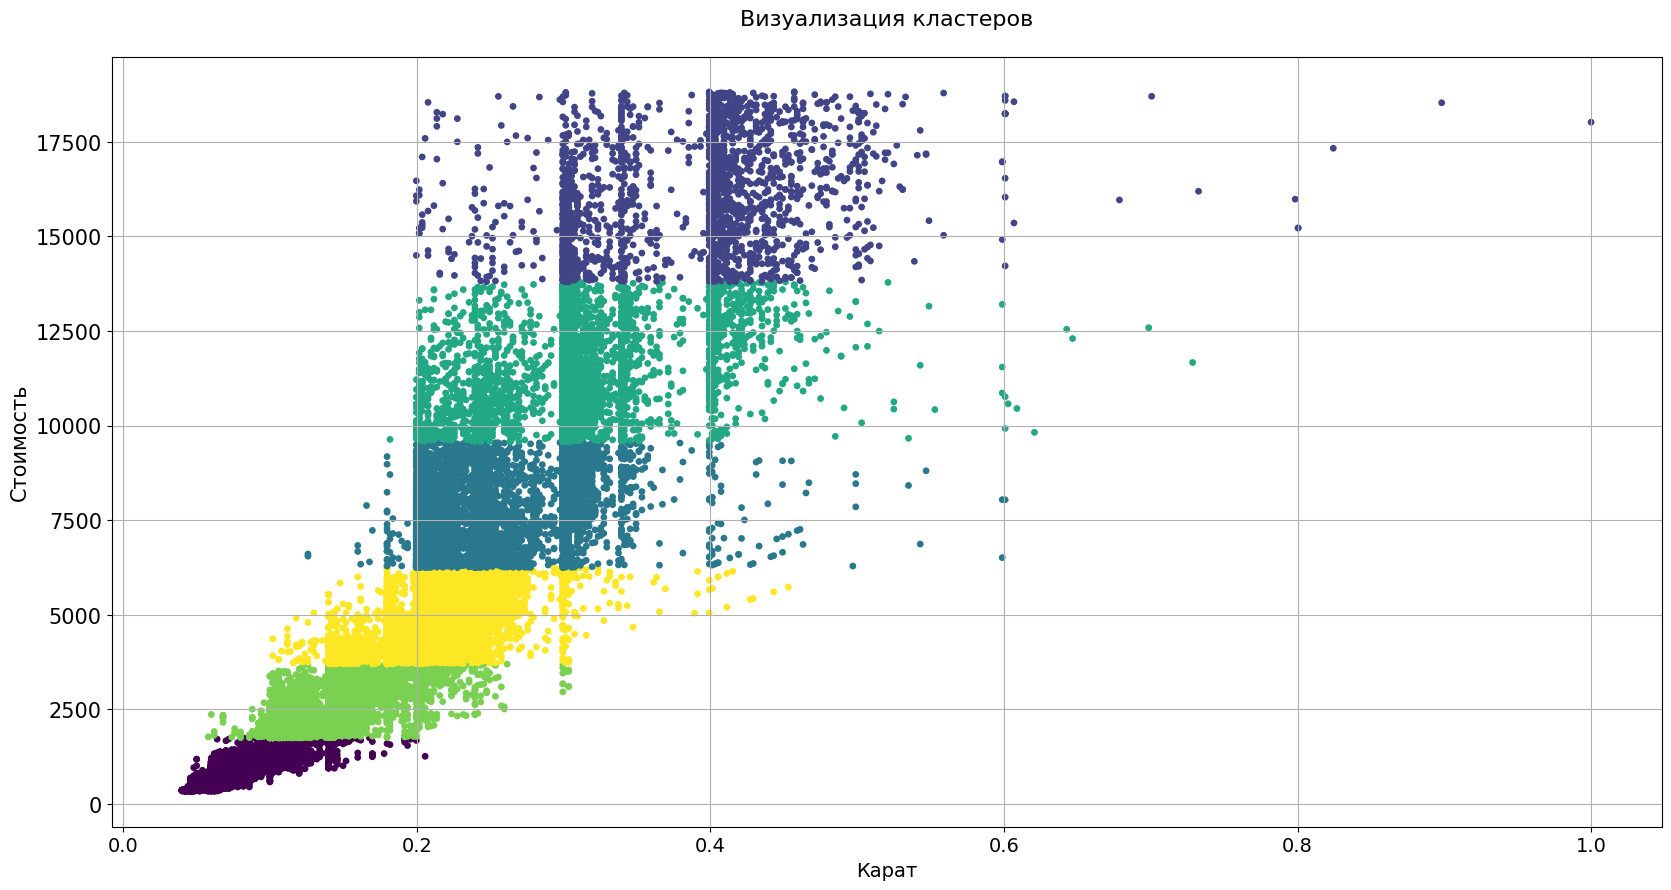

In [31]:
x6 = X_scaled['carat']
y6 = X_scaled['price']
plt.figure(figsize=(20, 10))
plt.title("Визуализация кластеров\n", fontsize=16)
plt.scatter(x=x6, y=y6, s=15, c=y_pred_km_6)
plt.grid(True)
plt.xlabel("Карат", fontsize=14)
plt.ylabel("Стоимость", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

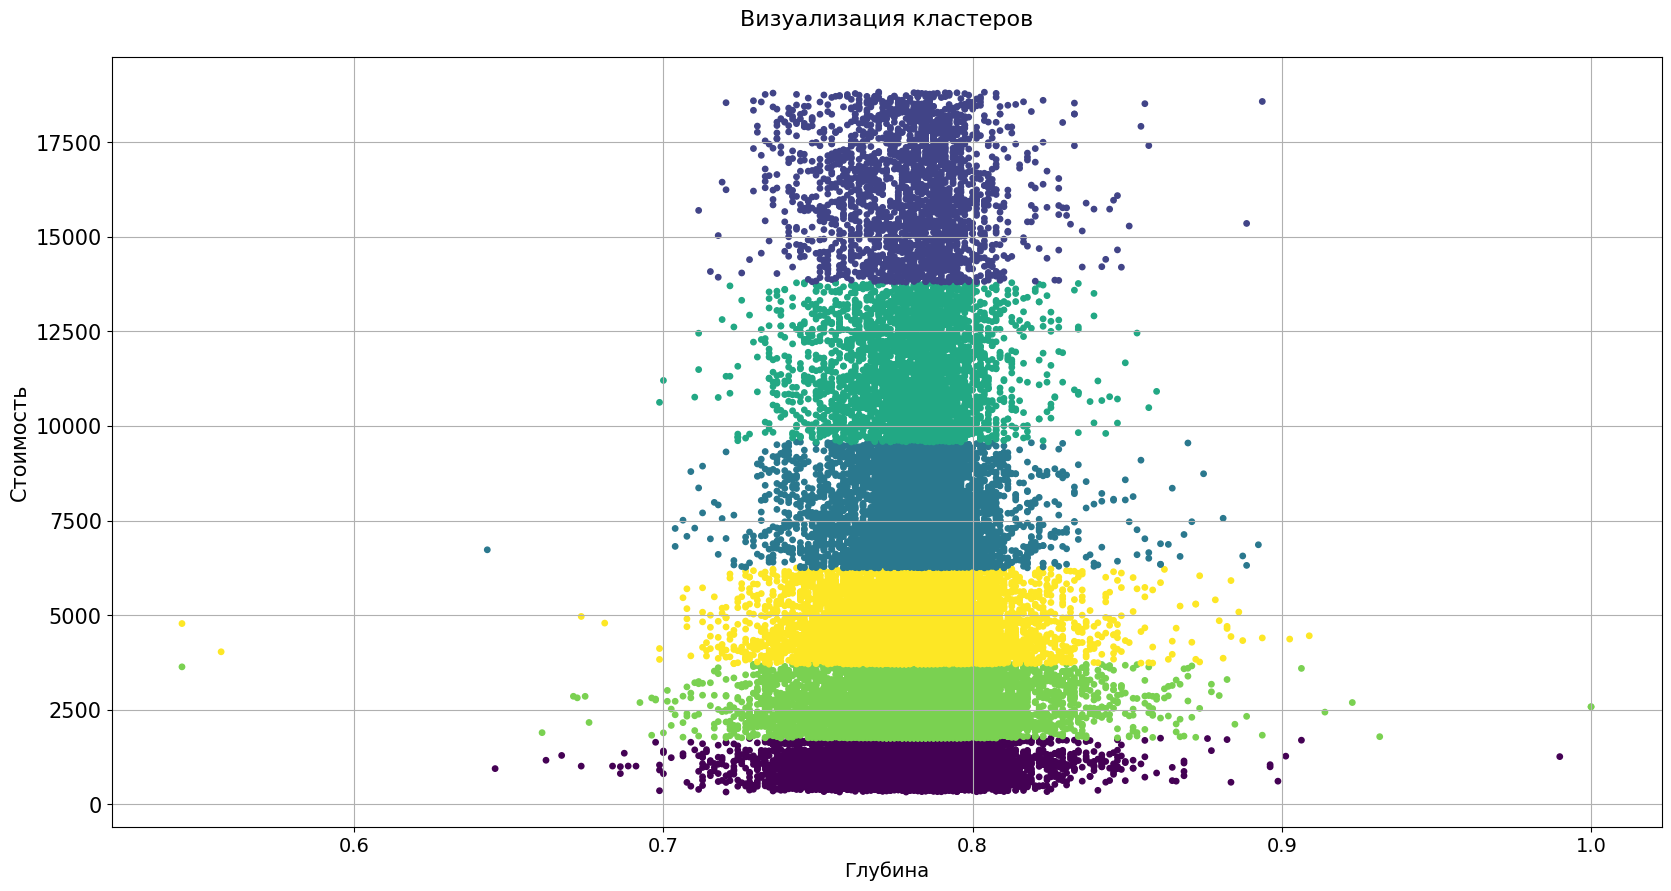

In [33]:
x6 = X_scaled['depth']
y6 = X_scaled['price']
plt.figure(figsize=(20, 10))
plt.title("Визуализация кластеров\n", fontsize=16)
plt.scatter(x=x6, y=y6, s=15, c=y_pred_km_6)
plt.grid(True)
plt.xlabel("Глубина", fontsize=14)
plt.ylabel("Стоимость", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

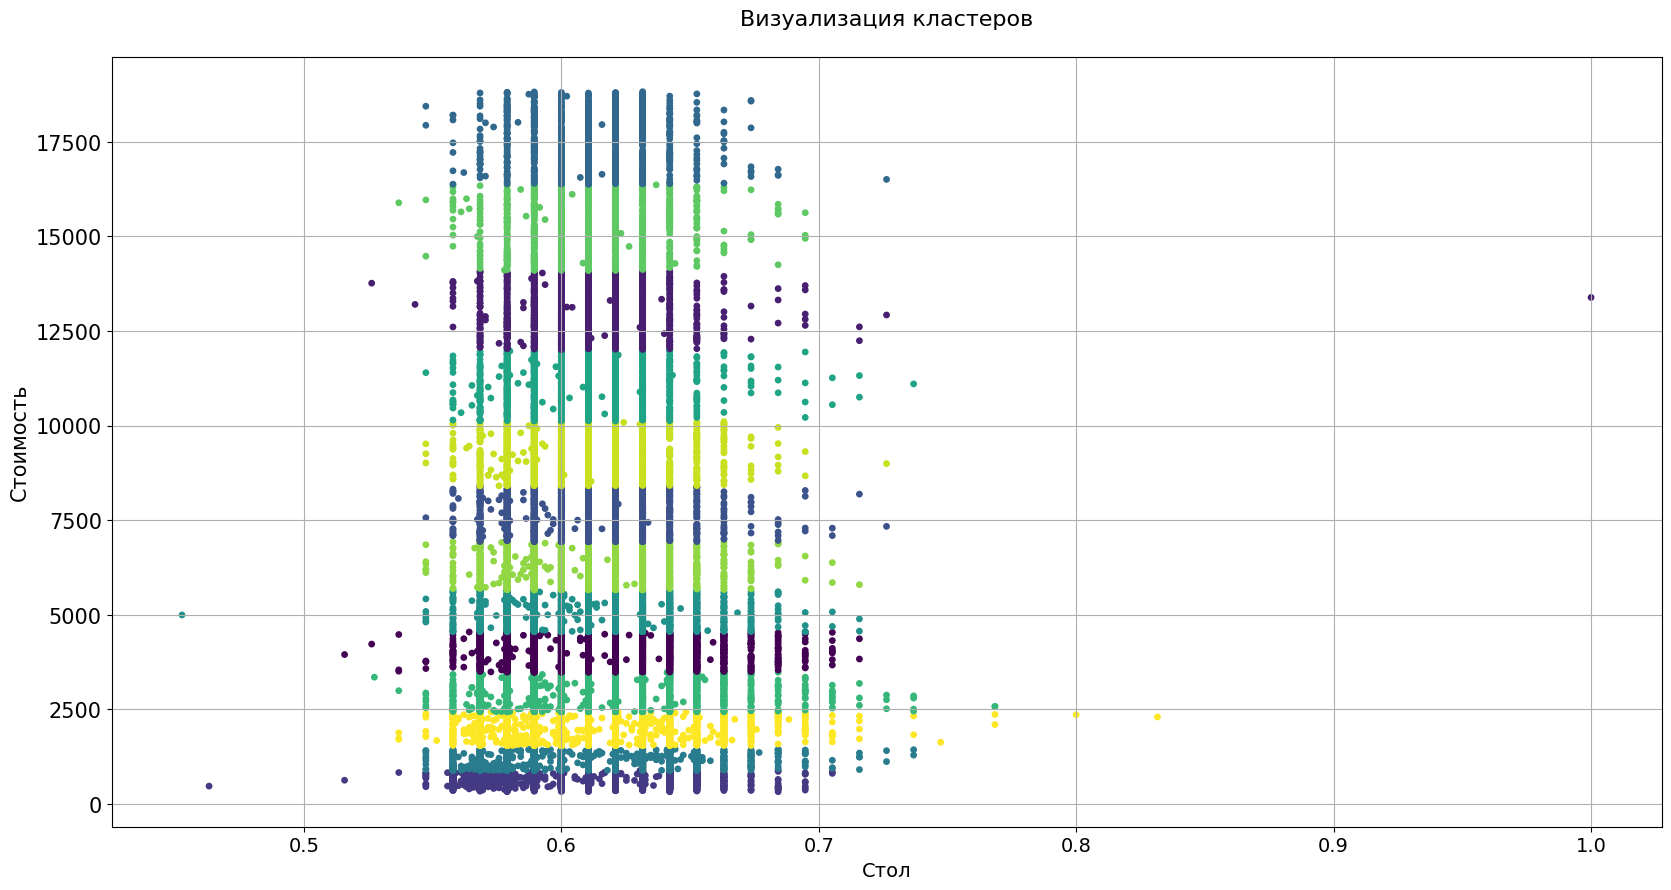

In [40]:
x13 = X_scaled['table']
y13 = X_scaled['price']
plt.figure(figsize=(20, 10))
plt.title("Визуализация кластеров\n", fontsize=16)
plt.scatter(x=x13, y=y13, s=15, c=y_pred_km_13)
plt.grid(True)
plt.xlabel("Стол", fontsize=14)
plt.ylabel("Стоимость", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [41]:
model_dbscan = DBSCAN(eps=1000, min_samples=100)

y_pred_dbscan = model_dbscan.fit_predict(X_scaled)

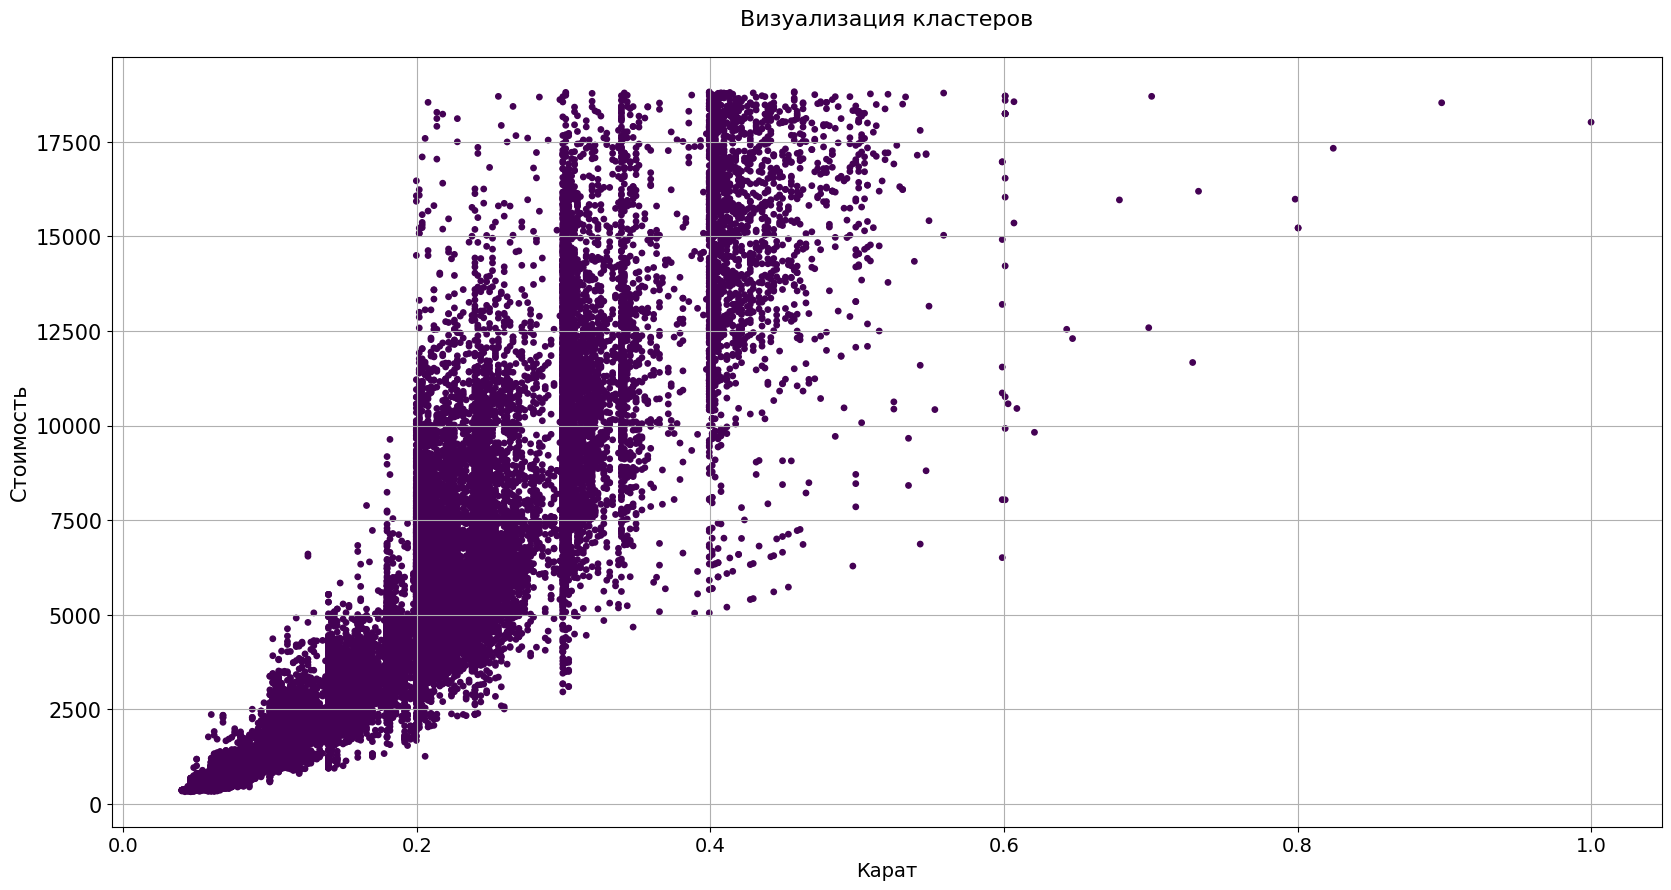

In [44]:
xdbs = X_scaled['carat']
ydbs = X_scaled['price']
plt.figure(figsize=(20, 10))
plt.title("Визуализация кластеров\n", fontsize=16)
plt.scatter(x=xdbs, y=ydbs, s=15, c=y_pred_dbscan)
plt.grid(True)
plt.xlabel("Карат", fontsize=14)
plt.ylabel("Стоимость", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [45]:
#Здесь фактическое шкалирование
from sklearn.preprocessing import MinMaxScaler

mms = {}
dfs = X_scaled.copy(deep=True)
for c in X_scaled.columns:
    mms[c] = MinMaxScaler().fit(dfs[c].values.reshape(-1, 1))
    dfs[c] = mms[c].transform(dfs[c].values.reshape(-1, 1))


In [46]:
dfs

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.022869,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.108108,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.103950,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.137214,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
model_cluster_6 = KMeans(6)
model_cluster_6.fit(dfs)
y_pred_km_6 = model_cluster_6.predict(dfs)
dfs['Кластер'] = kmeans.labels_

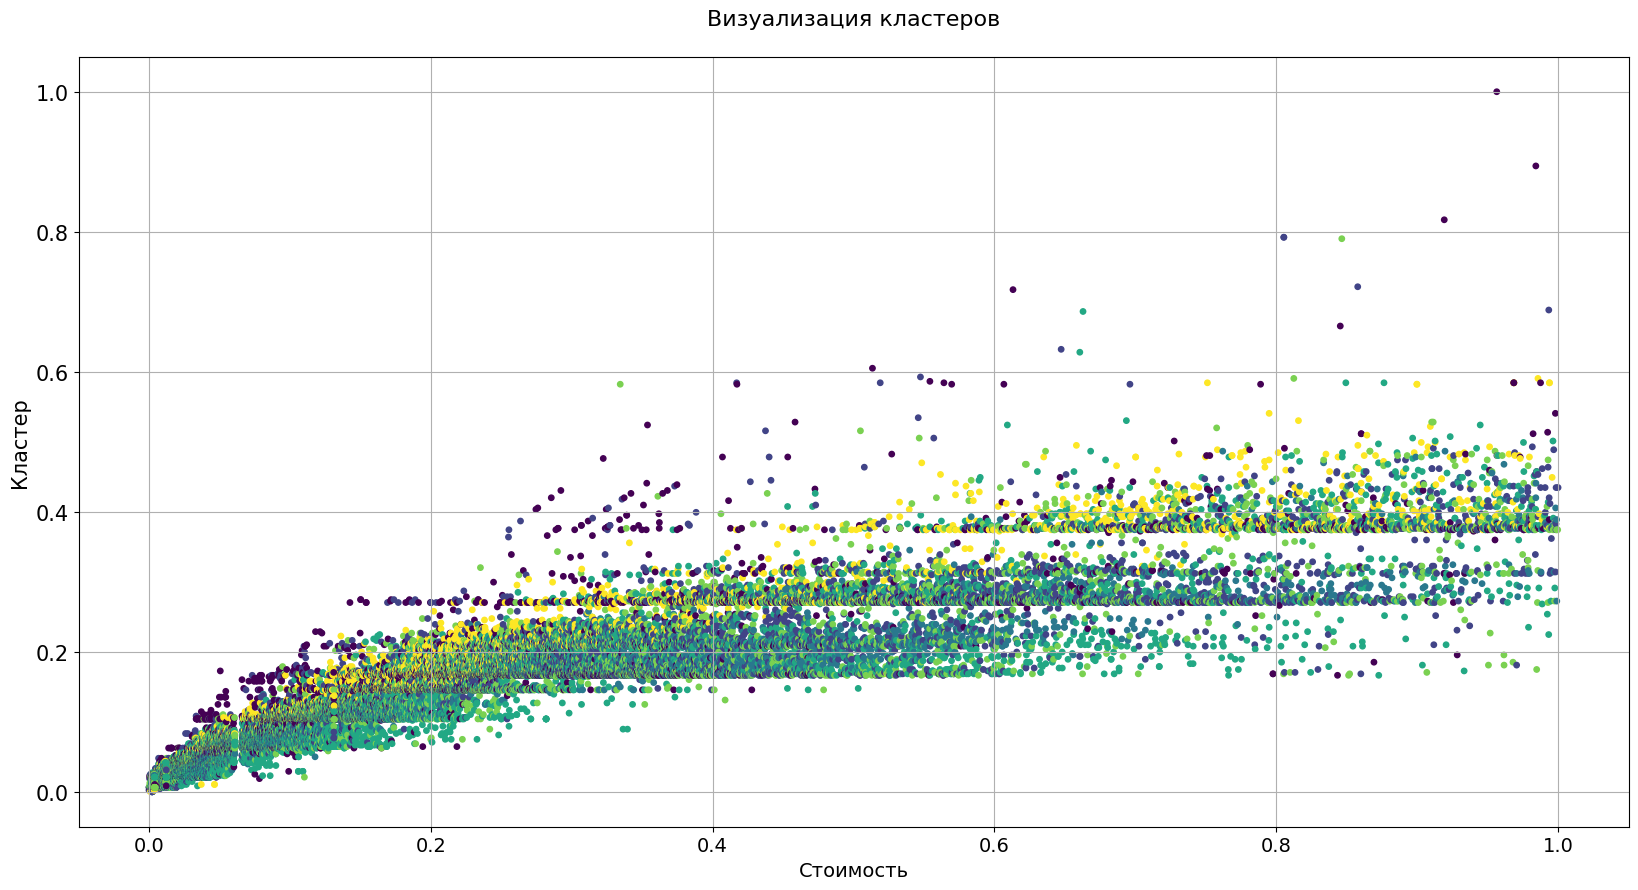

In [48]:
x6 = dfs['carat']
y6 = dfs['price']
plt.figure(figsize=(20, 10))
plt.title("Визуализация кластеров\n", fontsize=16)
plt.scatter(x=y6, y=x6, s=15, c=y_pred_km_6)
plt.grid(True)
plt.xlabel("Стоимость", fontsize=14)
plt.ylabel("Кластер", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [49]:
dfs.loc[dfs['Кластер'] == 0].describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,Кластер
count,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,...,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2853.0
mean,0.147749,0.524569,0.287874,0.182491,0.575669,0.104953,0.120233,0.056432,0.152822,0.297581,...,0.070803,0.043463,0.017525,0.221171,0.377848,0.121626,0.136348,0.032948,0.049071,0.0
std,0.028762,0.048605,0.046003,0.010783,0.029815,0.005108,0.007144,0.230794,0.359879,0.457275,...,0.256540,0.203933,0.131241,0.415108,0.484934,0.326911,0.343218,0.178531,0.216054,0.0
min,0.062370,0.000000,0.115385,0.163702,0.463687,0.083192,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.126819,0.500000,0.250000,0.173109,0.555866,0.101528,0.116038,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.145530,0.527778,0.288462,0.182949,0.575419,0.105093,0.120755,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.168399,0.550000,0.307692,0.191869,0.594972,0.108149,0.124528,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.274428,0.794444,0.480769,0.200952,0.691806,0.124788,0.150943,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [50]:
model_dbscan_s = DBSCAN(eps=0.0001, min_samples=100)
y_pred_dbscan_s = model_dbscan_s.fit_predict(dfs)

In [51]:
model_dbscan_s.get_params()

{'algorithm': 'auto',
 'eps': 0.0001,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 100,
 'n_jobs': None,
 'p': None}

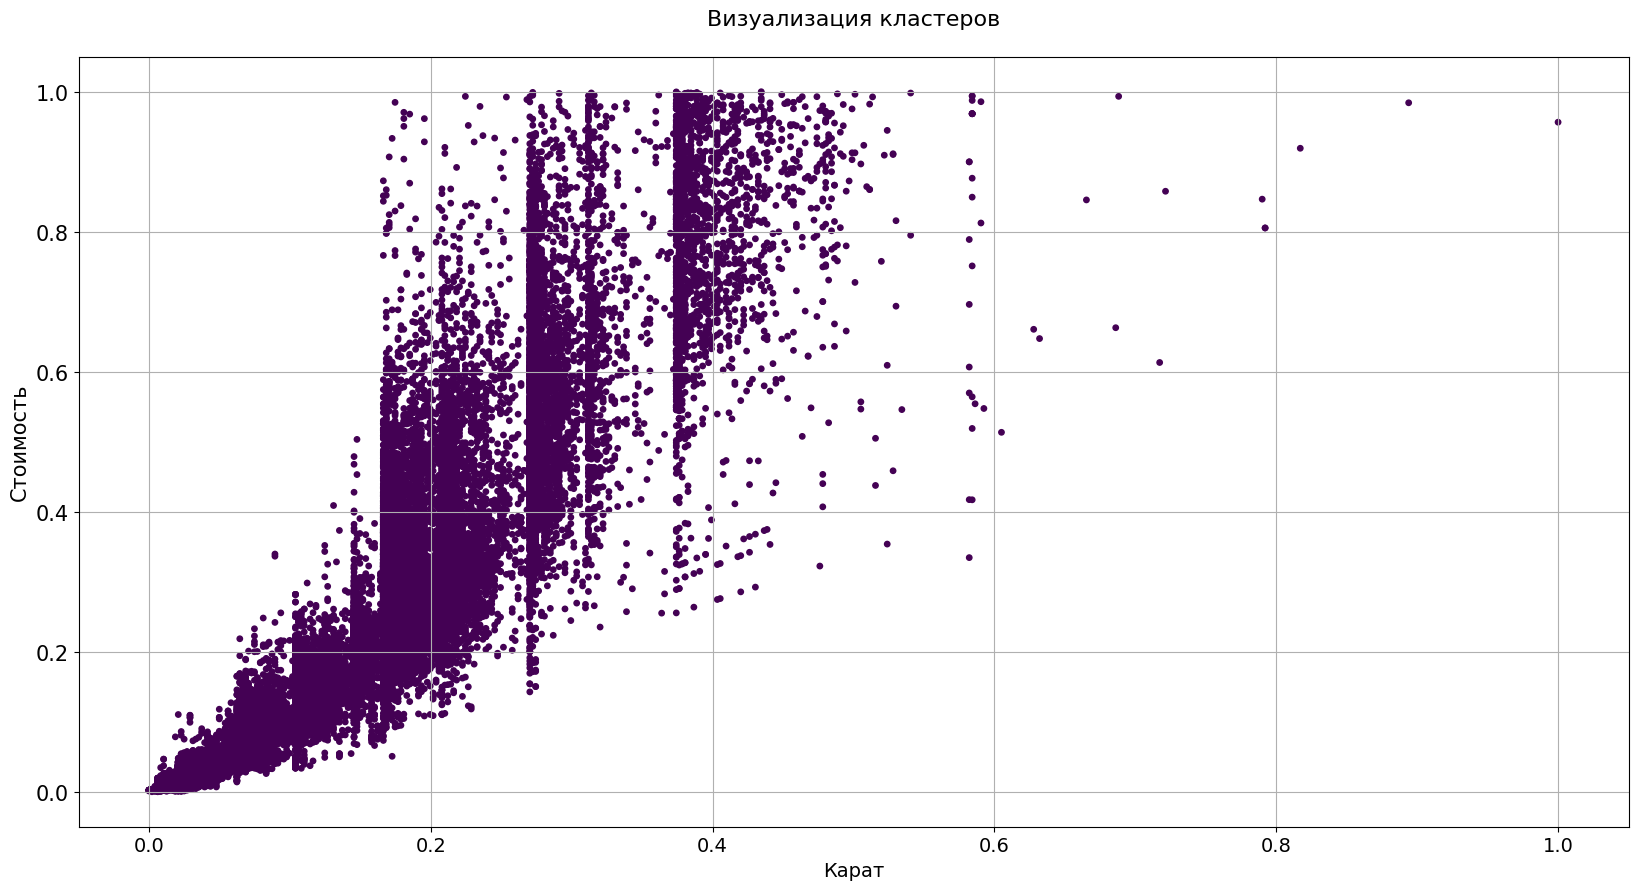

In [52]:
xdbs = dfs['carat']
ydbs = dfs['price']
plt.figure(figsize=(20, 10))
plt.title("Визуализация кластеров\n", fontsize=16)
plt.scatter(x=xdbs, y=ydbs, s=15, c=y_pred_dbscan_s)
plt.grid(True)
plt.xlabel("Карат", fontsize=14)
plt.ylabel("Стоимость", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [54]:
km_scores = []
km_silhouette = []
vmeasure_score = []
db_score = []

for i in range(2, t):
    km = KMeans(n_clusters=i, random_state=0).fit(dfs)
    preds = km.predict(dfs)

    print("Score for number of cluster(s) {}: {}".format(i, km.score(dfs)))
    km_scores.append(-km.score(dfs))

    silhouette = silhouette_score(dfs, preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i, silhouette))

    db = davies_bouldin_score(dfs, preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i, db))

    print("-" * 100)

Score for number of cluster(s) 2: -560811.1163374817
Silhouette score for number of cluster(s) 2: 0.5107428202697922
Davies Bouldin score for number of cluster(s) 2: 0.6826614743227782
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -278204.7389901581
Silhouette score for number of cluster(s) 3: 0.4754360863452609
Davies Bouldin score for number of cluster(s) 3: 0.7104044689258608
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -203832.20767112428
Silhouette score for number of cluster(s) 4: 0.44183081051911655
Davies Bouldin score for number of cluster(s) 4: 0.782857624593561
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -163158.54183500956
Silhouette score for number of cluster(s) 5: 0.39073411034192534
Davies Bouldin score f

In [55]:
km_scores = [560811.1163374817, 278204.7389901581, 203832.20767112428, 163158.54183500956, 153975.99086289082, 146804.46782108213, 142681.78890674596, 137677.10586994336, 133399.95213120576, 131176.23167418595, 127396.0686438324, 125986.09577764427, 123492.28028279601, 121508.80770393663,
             120795.01831743988, 118593.11307911851, 116818.73988532077, 117062.12512793143]
km_silhouette = [0.5107428202697922, 0.4754360863452609, 0.44183081051911655, 0.39073411034192534, 0.3514631590414399, 0.29657543217606286, 0.21139641664648426, 0.2285973181146147, 0.17830465266791146, 0.1725135951811031, 0.1702101814806891, 0.14924419358919702, 0.15962097529678987,
                 0.1437289455219936, 0.12910389491982674, 0.1471330438791791, 0.15212010670171605, 0.12987002028239988]
vmeasure_score = []
db_score = [0.6826614743227782, 0.7104044689258608, 0.782857624593561, 0.9441283640997694, 1.2116344394844396, 1.423472613802834, 1.8730615638709653, 1.7660512841777964, 2.0122332646748093, 2.095910139001109, 2.0672178456204993, 2.3811434718379965, 2.2051611447187422, 2.211067117052608,
            2.3184158026844, 2.202821980439076, 2.1263540818380893, 2.432330101035461]

[560811.1163374817, 278204.7389901581, 203832.20767112428, 163158.54183500956, 153975.99086289082, 146804.46782108213, 142681.78890674596, 137677.10586994336, 133399.95213120576, 131176.23167418595, 127396.0686438324, 125986.09577764427, 123492.28028279601, 121508.80770393663, 120795.01831743988, 118593.11307911851, 116818.73988532077, 117062.12512793143]
[0.5107428202697922, 0.4754360863452609, 0.44183081051911655, 0.39073411034192534, 0.3514631590414399, 0.29657543217606286, 0.21139641664648426, 0.2285973181146147, 0.17830465266791146, 0.1725135951811031, 0.1702101814806891, 0.14924419358919702, 0.15962097529678987, 0.1437289455219936, 0.12910389491982674, 0.1471330438791791, 0.15212010670171605, 0.12987002028239988]
[]
[0.6826614743227782, 0.7104044689258608, 0.782857624593561, 0.9441283640997694, 1.2116344394844396, 1.423472613802834, 1.8730615638709653, 1.7660512841777964, 2.0122332646748093, 2.095910139001109, 2.0672178456204993, 2.3811434718379965, 2.2051611447187422, 2.21106711

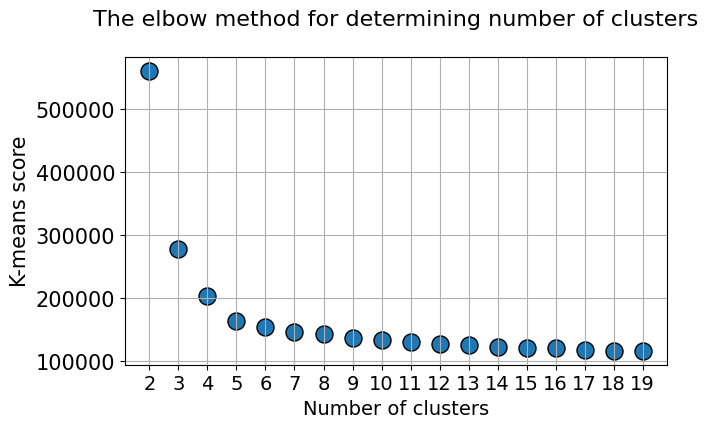

In [56]:
plt.figure(figsize=(7, 4))
plt.title("The elbow method for determining number of clusters\n", fontsize=16)
plt.scatter(x=[i for i in range(2, t)], y=km_scores, s=150, edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("K-means score", fontsize=15)
plt.xticks([i for i in range(2, t)], fontsize=14)
plt.yticks(fontsize=15)
plt.show()

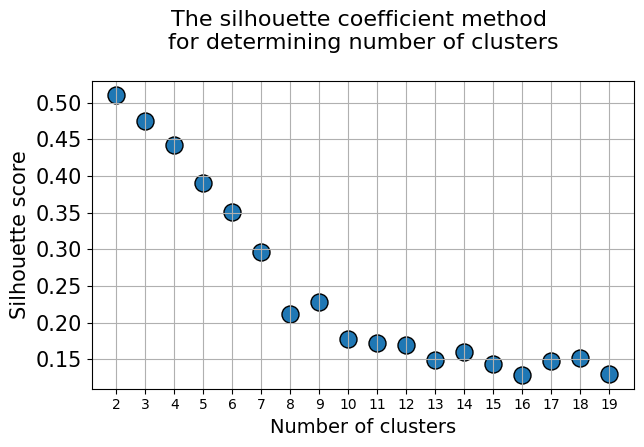

In [57]:
plt.figure(figsize=(7, 4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n", fontsize=16)
plt.scatter(x=[i for i in range(2, t)], y=km_silhouette, s=150, edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Silhouette score", fontsize=15)
plt.xticks([i for i in range(2, t)], fontsize=10)
plt.yticks(fontsize=15)
plt.show()

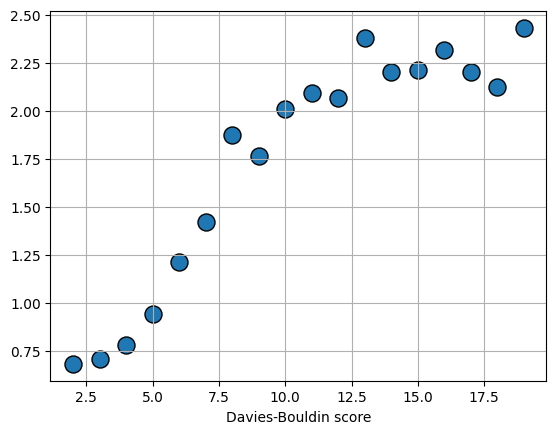

In [58]:
plt.scatter(x=[i for i in range(2, t)], y=db_score, s=150, edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

In [59]:
model_cluster_8 = KMeans(8)
model_cluster_8.fit(dfs)
y_pred_km_8 = model_cluster_8.predict(dfs)

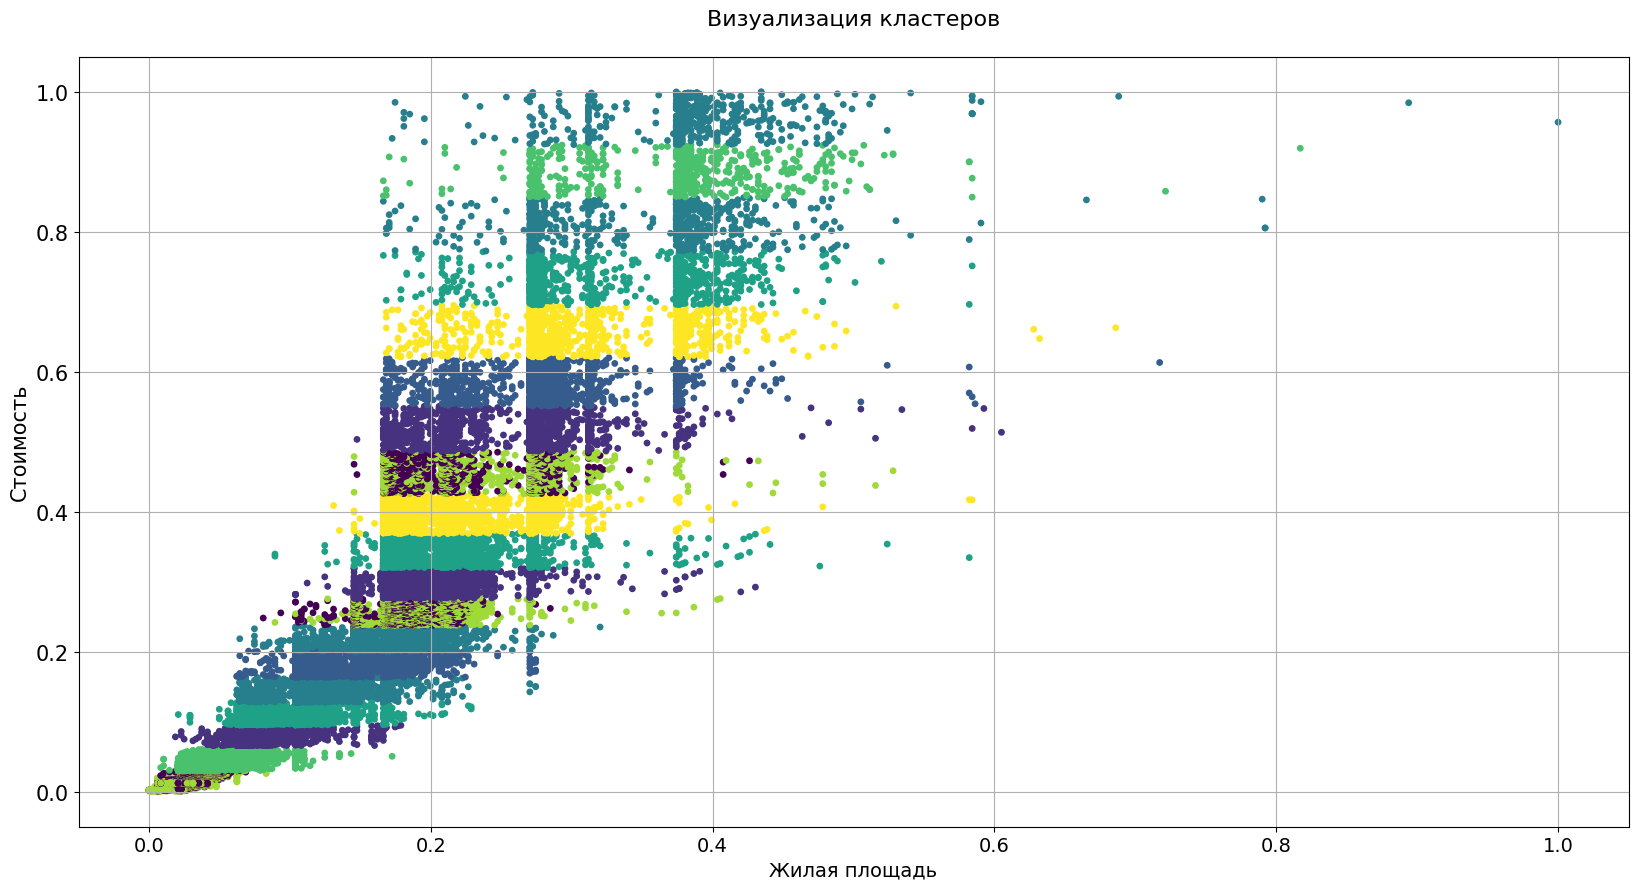

In [60]:
x13 = dfs['carat']
y13 = dfs['price']
plt.figure(figsize=(20, 10))
plt.title("Визуализация кластеров\n", fontsize=16)
plt.scatter(x=x13, y=y13, s=15, c=y_pred_km_8)
plt.grid(True)
plt.xlabel("Жилая площадь", fontsize=14)
plt.ylabel("Стоимость", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()